In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
%matplotlib inline

In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


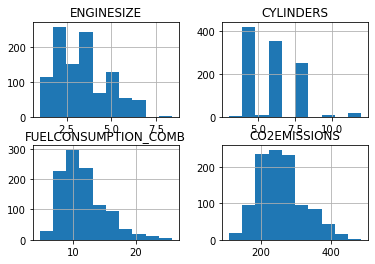

In [15]:
cdf = df[
    ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]
]
cdf.hist()
plt.show()

In [16]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

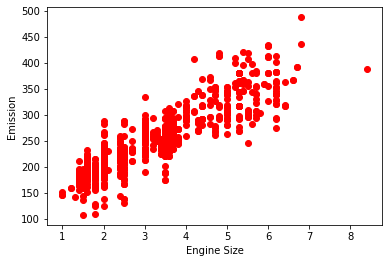

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'red')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[
    ['ENGINESIZE']
])
train_y  = np.asanyarray(train[
    ['CO2EMISSIONS']
])
regr.fit(train_x, train_y)

#The Coefficients
print('coeffieients: ',regr.coef_)
print('intercept: ' , regr.intercept_)


coeffieients:  [[39.6465121]]
intercept:  [123.44647624]


Text(0, 0.5, 'Emission')

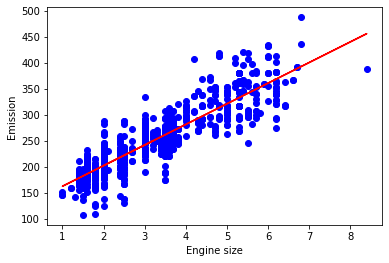

In [29]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")